# Linear algebra

To plot a vector in a 2-D space, we'll use Matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

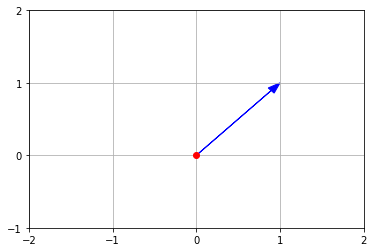

In [2]:
v = np.array([1, 1])

axes = plt.axes()
axes.plot(0, 0, 'ro')
axes.arrow(0, 0, *v, color = 'b', linewidth = 1.0, head_width = 0.1, head_length = 0.15,
           length_includes_head = True)

plt.xlim(-2, 2)
plt.ylim(-1, 2)

xticks = np.arange(-2, 3)
axes.set_xticks(xticks)

yticks = np.arange(-1, 3)
axes.set_yticks(yticks)

plt.grid(b = True, which = 'major')

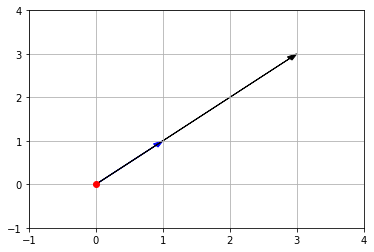

In [3]:
# Scaling vector
v = np.array([1, 1])
a = 3
av = a * v

axes = plt.axes()
axes.plot(0, 0, 'ro')

axes.arrow(0, 0, *v, color = 'b', linewidth = 1.0, head_width = 0.1, head_length = 0.15,
          length_includes_head = True)
axes.arrow(0, 0, *av, color = 'k', linewidth = 1.0, head_width = 0.1, head_length = 0.15,
          length_includes_head = True)

plt.xlim(-1, 4)
plt.ylim(-1, 4)

xticks = np.arange(-1, 5)
axes.set_xticks(xticks)

yticks = np.arange(-1, 5)
axes.set_yticks(yticks)

plt.grid(b = True, which = 'major')

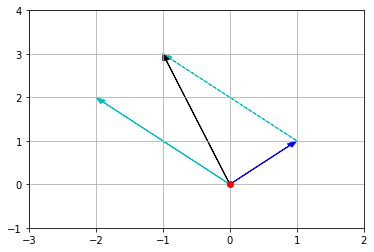

In [4]:
# Vector addition

v = np.array([1, 1])
w = np.array([-2, 2])
vw = v + w

axes = plt.axes()
axes.plot(0, 0, 'ro')

axes.arrow(0, 0, *v, color = 'b', linewidth = 1, head_width = 0.1, head_length = 0.15,
          length_includes_head = True)
axes.arrow(0, 0, *w, color = 'c', linewidth = 1, head_width = 0.1, head_length = 0.15,
          length_includes_head = True)
axes.arrow(v[0], v[1], *w, color = 'c', linestyle = 'dashed', linewidth = 1, head_width = 0.1, head_length = 0.15,
          length_includes_head = True)
axes.arrow(0, 0, *vw, color = 'k', linewidth = 1, head_width = 0.1, head_length = 0.15,
          length_includes_head = True)

plt.xlim(-3, 2)
plt.ylim(-1, 4)

xticks = np.arange(-3, 3)
axes.set_xticks(xticks)

yticks = np.arange(-1, 5)
axes.set_yticks(yticks)

plt.grid(b = True, which = 'major')

## Span

A vector's span is a set of all possible vector reachable with a linear combination of a given pair of vectors.

Given vectors $\vec{x}$ and $\vec{y}$, $\vec{z}$ is a linear combination of them (is within their span) if $a\vec{x} + b\vec{y} = \vec{z}$, where $a$ and $b$ are scalars.

If $\hspace{0.3cm}\vec{x} = \begin{bmatrix} 1\\ 3\end{bmatrix}$, $\hspace{0.3cm}\vec{y} = \begin{bmatrix} 2\\ 5\end{bmatrix}$, $\hspace{0.3cm}\vec{z} = \begin{bmatrix} 4\\ 11\end{bmatrix}$, then the equation above can be rewritten as the following:

$$a \begin{bmatrix} 1\\ 3\end{bmatrix} + b \begin{bmatrix} 2\\ 5\end{bmatrix} = \begin{bmatrix} 4\\ 11\end{bmatrix}$$

And the augmented matrix is:

$$
\left[
\begin{array}{cc|c}
1 & 2 & 4 \\
3 & 5 & 11 \\
\end{array}
\right]
$$

NumPy's [`numpy.linalg`](https://numpy.org/doc/stable/reference/routines.linalg.html) help us solve this problem.

In [5]:
def check_vector_span(set_of_vectors, vector_to_check):
    vector_of_scalars = np.asarray([None] * set_of_vectors.shape[0])
    
    try:
        vector_of_scalars = np.linalg.solve(set_of_vectors, vector_to_check)

        if not (vector_of_scalars is None):
            print("\nVector is within span.\nScalars in s:", vector_of_scalars)
    except Exception as exception_type:
        if str(exception_type) == "Singular matrix":
            print("\nNo single solution\nVector is NOT within span")
        else:
            print("\nUnexpected Exception Error:", exception_type)

    return vector_of_scalars

In [6]:
x = np.array([1, 3])
y = np.array([2, 5])
z = np.array([4, 11])

xy = np.array([[1, 2], [3, 5]])
check_vector_span(xy, z)

x2 = np.array([1, 2])
y2 = np.array([2, 4])
z2 = np.array([6, 12])

xy2 = np.array([[1, 2], [2, 4]])
check_vector_span(xy2, z2)

x3 = np.array([1, 1])
y3 = np.array([2, 2])
z3 = np.array([6, 10])

xy3 = np.array([[1, 1], [2, 2]])
check_vector_span(xy3, z3);


Vector is within span.
Scalars in s: [2. 1.]

No single solution
Vector is NOT within span

No single solution
Vector is NOT within span


> From [`numpy.linalg.solve`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html): a `LinAlgError` will be raised if the system of equations does not have a **unique** solution!

## System of equations

Each equation in a system of equations can be plotted as a line in a 2-D plane.

- If there's a single solution to the system, it's graphically represented as the intersection of two lines.
- If there are infinite solutions, it's graphically represented as two overlapping lines.
- If there is no solution, it's graphically represented as two parallel lines.

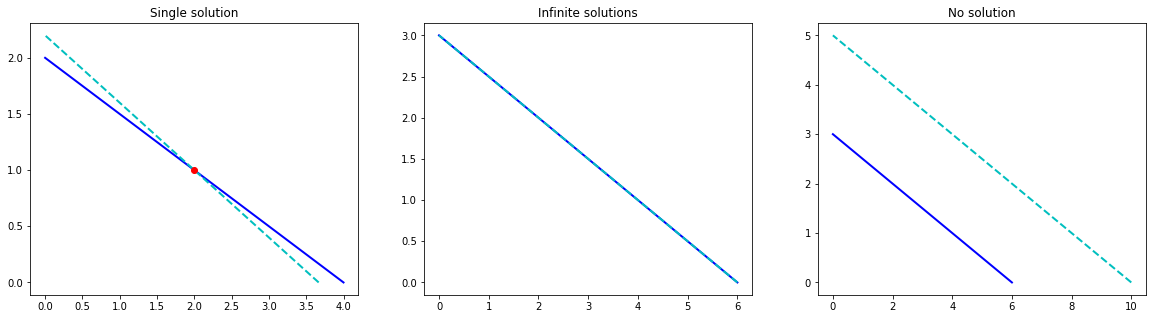

In [7]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 3, 1)
plt.plot([4, 0], [0, 2], color = 'b', linewidth = 2)
plt.plot([3.667, 0], [0, 2.2], color = 'c', linestyle = 'dashed', linewidth = 2)
plt.plot(2, 1, 'ro', linewidth = 2)
plt.title('Single solution')

plt.subplot(1, 3, 2)
plt.plot([6, 0], [0, 3], color = 'b', linewidth = 2)
plt.plot([6, 0], [0, 3], color = 'c', linestyle = 'dashed', linewidth = 2)
plt.title('Infinite solutions')

plt.subplot(1, 3, 3)
plt.plot([6, 0], [0, 3], color = 'b', linewidth = 2)
plt.plot([10, 0], [0, 5], color = 'c', linestyle = 'dashed', linewidth = 2)
plt.title('No solution');

## Matrix multiplication

Vectors can be decomposed into its basis vectors, $\hat{i}$ and $\hat{j}$.

$\vec{v} = \begin{bmatrix} -1\\ 2\end{bmatrix}$

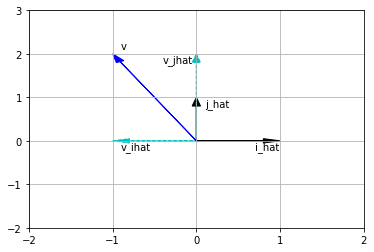

In [8]:
v = np.array([-1, 2])
i_hat = np.array([1,0])
j_hat = np.array([0,1])

axes = plt.axes()

axes.arrow(0, 0, *i_hat, color = 'k', linewidth = 1, head_width = 0.1, head_length = 0.2,
           length_includes_head = True)
plt.text(0.7, -0.2, 'i_hat')

axes.arrow(0, 0, *j_hat, color = 'k', linewidth = 1, head_width = 0.1, head_length = 0.2,
           length_includes_head = True)
plt.text(0.1, 0.8, 'j_hat')

v_ihat = v[0] * i_hat
v_jhat = v[1] * j_hat

axes.arrow(0, 0, *v_ihat, color = 'c', linestyle = 'dashed', linewidth = 1, head_width = 0.1, head_length = 0.2,
           length_includes_head = True)
plt.text(-0.9, -0.2, 'v_ihat')

axes.arrow(0, 0, *v_jhat, color = 'c', linestyle = 'dashed', linewidth = 1, head_width = 0.1, head_length = 0.2,
           length_includes_head = True)
plt.text(-0.4, 1.8, 'v_jhat')

axes.arrow(0, 0, *v, color = 'b', linewidth = 1, head_width = 0.1, head_length = 0.2,
           length_includes_head = True)
plt.text(-0.9, 2.1, 'v')

plt.xlim(-2, 2)
plt.ylim(-2, 3)

x_ticks = np.arange(-2, 3)
axes.set_xticks(x_ticks)

y_ticks = np.arange(-2, 4)
axes.set_yticks(y_ticks)

plt.grid(b = True, which = 'major')

We can transform $\vec{v}$ by using a different pair of axes, $\vec{\mathbin{\hat{i_T}}}$ and $\vec{\mathbin{\hat{j_T}}}$.

$\hspace{1cm}\vec{v} = \begin{bmatrix} -1\\ 2\end{bmatrix}$

$\hspace{1cm}\vec{\mathbin{\color{green}{\hat{i_T}}}} = \begin{bmatrix}\mathbin{\color{green}3}\\ \mathbin{\color{green}1} \end{bmatrix}$

$\hspace{1cm}\vec{\mathbin{\color{red}{\hat{j_T}}}} = \begin{bmatrix}\mathbin{\color{red}1}\\ \mathbin{\color{red}2} \end{bmatrix}$

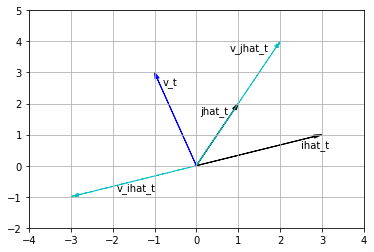

In [9]:
v = np.array([-1, 2])
ihat_t = np.array([3, 1])
jhat_t = np.array([1, 2])

axes = plt.axes()

axes.arrow(0, 0, *ihat_t, color = 'k', linewidth = 1, head_width = 0.1, head_length = 0.2,
           length_includes_head = True)
plt.text(2.5, 0.6, 'ihat_t')

axes.arrow(0, 0, *jhat_t, color = 'k', linewidth = 1, head_width = 0.1, head_length = 0.2,
           length_includes_head = True)
plt.text(0.1, 1.7, 'jhat_t')

v_ihat_t = v[0] * ihat_t
v_jhat_t = v[1] * jhat_t

axes.arrow(0, 0, *v_ihat_t, color = 'c', linestyle = 'dashed', linewidth = 1, head_width = 0.1, head_length = 0.2,
           length_includes_head = True)
plt.text(-1.9, -0.8, 'v_ihat_t')

axes.arrow(0, 0, *v_jhat_t, color = 'c', linestyle = 'dashed', linewidth = 1, head_width = 0.1, head_length = 0.2,
           length_includes_head = True)
plt.text(0.8, 3.7, 'v_jhat_t')

v_t = v_ihat_t + v_jhat_t

axes.arrow(0, 0, *v_t, color = 'b', linewidth = 1, head_width = 0.1, head_length = 0.2,
           length_includes_head = True)
plt.text(-0.8, 2.6, 'v_t')

plt.xlim(-4, 4)
plt.ylim(-2, 5)

x_ticks = np.arange(-4, 5)
axes.set_xticks(x_ticks)

y_ticks = np.arange(-2, 6)
axes.set_yticks(y_ticks)

plt.grid(b = True, which = 'major')

Finding the transformed $\vec{v}$ is the same as finding the result of the multiplication of the following matrix:

$\hspace{1cm} \begin{bmatrix} \mathbin{\color{green}3} & \mathbin{\color{red}1}\\ \mathbin{\color{green}1} & \mathbin{\color{red}2}\end{bmatrix} \begin{bmatrix} -1\\ 2\end{bmatrix} = -1 \begin{bmatrix}\mathbin{\color{green}3}\\ \mathbin{\color{green}1} \end{bmatrix} + 2 \begin{bmatrix} \mathbin{\color{red}1}\\ \mathbin{\color{red}2} \end{bmatrix} = \begin{bmatrix} {-1}\times\mathbin{\color{green}3} +\,2\times\mathbin{\color{red}1}\\ {-1}\times\mathbin{\color{green}1} +\, 2\times\mathbin{\color{red}2}\end{bmatrix} = \begin{bmatrix} -1\\ 3\end{bmatrix}$